In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# pip install folium

In [3]:
Data = pd.read_csv('Us_Accident_TX_23.csv')

In [4]:
Data.head(3)

,Unnamed: 0,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,377589,A-3650486,Source1,2,2023-03-21 13:33:41.000000000,2023-03-21 19:33:40.000000000,30.212703,-97.658590,0.080,Accident,...,False,False,False,False,True,False,Day,Day,Day,Day
1,377590,A-3650495,Source1,2,2023-03-27 07:24:30.000000000,2023-03-27 09:03:01.000000000,32.748310,-96.809763,4.530,Slow traffic on I-35E N - US-67 N - US-77 N - ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,377591,A-3650583,Source1,2,2023-03-20 08:10:30.000000000,2023-03-20 14:10:29.000000000,30.390522,-97.742234,0.074,Accident,...,False,False,False,False,False,False,Day,Day,Day,Day
3,377592,A-3650610,Source1,2,2023-03-28 06:07:30.000000000,2023-03-28 08:12:21.000000000,32.786003,-96.812521,0.443,Accident from Continental Ave to N Riverfront ...,...,False,False,False,False,False,False,Night,Night,Night,Day
4,377593,A-3650629,Source1,2,2023-02-26 02:39:30.000000000,2023-02-26 04:47:27.000000000,32.780447,-96.783935,0.139,Accident from exit [284A] to I-30 E.,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13819,465871,A-5464217,Source1,2,2023-01-19 16:15:37.000000000,2023-01-19 17:30:37.000000000,32.778419,-96.802541,0.010,Incident on JACKSON ST near S GRIFFIN ST Drive...,...,False,True,False,False,True,False,Day,Day,Day,Day
13820,465880,A-5464399,Source1,2,2023-01-18 17:25:00.000000000,2023-01-18 18:43:01.000000000,29.468862,-98.516024,0.588,Incident on I-10 EB near HILDEBRAND Drive with...,...,False,False,False,False,False,False,Day,Day,Day,Day
13821,465886,A-5464675,Source1,2,2023-01-19 14:52:14.000000000,2023-01-19 16:07:14.000000000,29.697432,-95.423674,0.094,Incident on N BRAESWOOD BLVD near BROMPTON ST ...,...,False,True,True,False,False,False,Day,Day,Day,Day
13822,465889,A-5464712,Source1,2,2023-01-24 10:23:26.000000000,2023-01-24 11:38:26.000000000,32.917276,-96.717765,0.034,Incident on AUDELIA RD near SHADOW WAY Drive w...,...,False,False,False,False,False,False,Day,Day,Day,Day


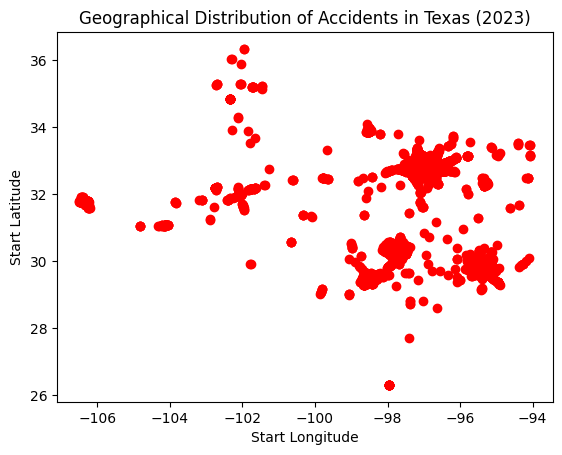

In [14]:
# Scatter plot of the clusters
plt.scatter(Data['Start_Lng'], Data['Start_Lat'],color='red')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.title('Geographical Distribution of Accidents in Texas (2023)')

plt.show()

## K-Means Clustering



In [5]:
from sklearn.cluster import KMeans

In [6]:
coordinates = Data[['Start_Lat', 'Start_Lng']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

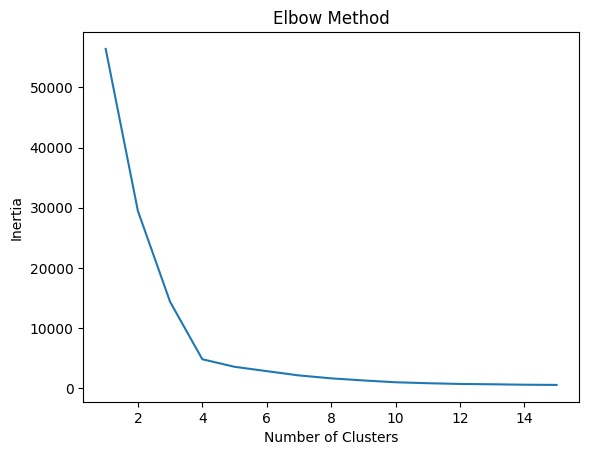

In [7]:
# Perform elbow method to find the optimal number of clusters
inertia = []
max_clusters = 15  # Maximum number of clusters to test

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(coordinates)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
import matplotlib.pyplot as plt

plt.plot(range(1, max_clusters + 1), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [8]:
# Choose the optimal number of clusters based on the elbow method
optimal_clusters = 4  # Adjust this based on the elbow plot

# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(coordinates)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [9]:
# Add the cluster labels to the dataset
Data['Cluster'] = kmeans.labels_

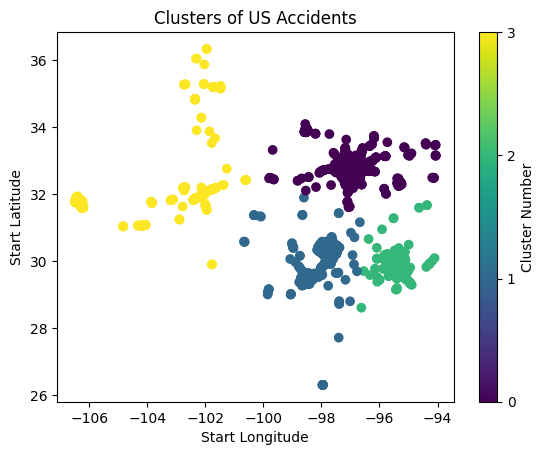

In [10]:
import matplotlib.pyplot as plt

# Scatter plot of the clusters
scatter = plt.scatter(Data['Start_Lng'], Data['Start_Lat'], c=Data['Cluster'], cmap='viridis')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.title('Clusters of US Accidents')

# Create a colorbar legend to map cluster numbers to colors
legend = plt.colorbar(scatter, ticks=range(optimal_clusters))
legend.set_label('Cluster Number')
plt.show()

In [11]:
Data.head()

,Unnamed: 0,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Cluster
0,377589,A-3650486,Source1,2,2023-03-21 13:33:41.000000000,2023-03-21 19:33:40.000000000,30.212703,-97.658590,0.080,Accident,...,False,False,False,True,False,Day,Day,Day,Day,1
1,377590,A-3650495,Source1,2,2023-03-27 07:24:30.000000000,2023-03-27 09:03:01.000000000,32.748310,-96.809763,4.530,Slow traffic on I-35E N - US-67 N - US-77 N - ...,...,False,False,False,False,False,Day,Day,Day,Day,0
2,377591,A-3650583,Source1,2,2023-03-20 08:10:30.000000000,2023-03-20 14:10:29.000000000,30.390522,-97.742234,0.074,Accident,...,False,False,False,False,False,Day,Day,Day,Day,1
3,377592,A-3650610,Source1,2,2023-03-28 06:07:30.000000000,2023-03-28 08:12:21.000000000,32.786003,-96.812521,0.443,Accident from Continental Ave to N Riverfront ...,...,False,False,False,False,False,Night,Night,Night,Day,0
4,377593,A-3650629,Source1,2,2023-02-26 02:39:30.000000000,2023-02-26 04:47:27.000000000,32.780447,-96.783935,0.139,Accident from exit [284A] to I-30 E.,...,False,False,False,False,False,Night,Night,Night,Night,0


## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups together data points that are close to each other in dense regions and considers data points in less dense regions as noise. It is particularly effective in identifying clusters of arbitrary shape and handling outliers.

Algorithm Overview:

1. DBSCAN requires two input parameters: epsilon (eps) and minimum number

2. For each data point, DBSCAN measures the density of its neighborhood within a distance of epsilon.

3. If the density exceeds the threshold defined by min_samples, the point is considered a core point and a new cluster is formed.

4. DBSCAN then expands the cluster by connecting core points to their nearby points.

5. Points that are reachable from core points but do not have sufficient density are considered border points and are assigned to one of the clusters.

6. Points that are not reachable from any core points are considered outliers or noise.

In [15]:
from sklearn.cluster import DBSCAN

In [26]:
eps = 0.5
min_samples = 5

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(coordinates)

DBSCAN()

In [27]:
# Add the cluster labels to the dataset
Data['DBScanCluster'] = dbscan.labels_

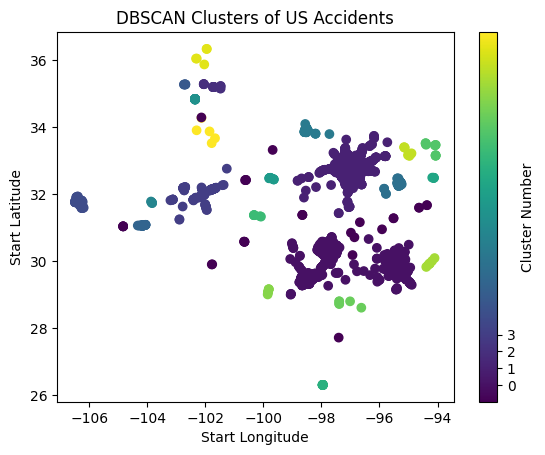

In [28]:
# Scatter plot of the DBSCAN clusters
scatter=plt.scatter(Data['Start_Lng'], Data['Start_Lat'], c=Data['DBScanCluster'], cmap='viridis')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.title('DBSCAN Clusters of US Accidents')

legend = plt.colorbar(scatter, ticks=range(len(set(Data['Cluster']))))
legend.set_label('Cluster Number')

plt.show()

## Gaussian Mixture Model (GMM)

Gaussian Mixture Model (GMM) is a probabilistic model that assumes data points are generated from a mixture of Gaussian distributions. It is a soft clustering algorithm that assigns a probability to each data point for belonging to each cluster.

Algorithm Overview:

1. GMM assumes that the data points are generated from a mixture of K Gaussian distributions.

2. The algorithm estimates the parameters of these Gaussian distributions, including means, covariances, and mixture weights.
3. It iteratively updates the parameters to maximize the likelihood of the observed data.
4. GMM assigns a probability to each data point for belonging to each cluster based on the estimated parameters.
5. The data point is then assigned to the cluster with the highest probability.

In [29]:
from sklearn.mixture import GaussianMixture

To find the optimal number of clusters in Gaussian Mixture Model (GMM), We can use techniques such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC). These criteria provide a quantitative measure of the model's goodness of fit while penalizing the model complexity.

Now We will use Bayesian Information Criterion (BIC)

In [34]:
# Define a range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10

# Initialize variables
best_bic = np.inf
best_aic = np.inf
optimal_clusters = 0

# Iterate over different cluster numbers
for n_clusters in range(min_clusters, max_clusters + 1):
    # Perform GMM clustering
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(coordinates)

    # Calculate the BIC score
    bic = gmm.bic(coordinates)

    # Calculate the AIC score
    aic = gmm.aic(coordinates)

    # Check if the current number of clusters has lower AIC score
    if aic < best_aic:
        best_aic = aic
        optimal_clusters = n_clusters

    # Check if the current number of clusters has lower BIC score
    if bic < best_bic:
        best_bic = bic
        optimal_clusters = n_clusters

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_clusters)

Optimal number of clusters: 9


It keeps track of the best AIC and BIC scores separately and updates the optimal_clusters variable accordingly. At the end of the loop, it printed 9 which is  the optimal number of clusters based on the lowest AIC or BIC score.

In [35]:
# Set the number of clusters (K)
n_clusters = 9

# Perform GMM clustering
gmm = GaussianMixture(n_components=n_clusters, random_state=0)
gmm.fit(coordinates)

GaussianMixture(n_components=9, random_state=0)

In [36]:
# Add the cluster labels to the dataset
Data['GMM_Cluster'] = gmm.predict(coordinates)

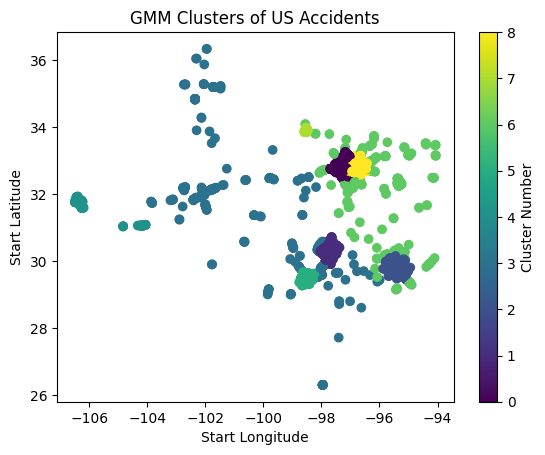

In [37]:
# Scatter plot of the DBSCAN clusters
scatter=plt.scatter(Data['Start_Lng'], Data['Start_Lat'], c=Data['GMM_Cluster'], cmap='viridis')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.title('GMM Clusters of US Accidents')

legend = plt.colorbar(scatter, ticks=range(len(set(Data['GMM_Cluster']))))
legend.set_label('Cluster Number')

plt.show()